#EDA - 1


#Title: Bike Details Dataset



In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data from the csv file
df = pd.read_csv('BIKE DETAILS.csv')

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


#Questions:



In [2]:
#1. What is the range of selling prices in the dataset?

selling_price_range = df['selling_price'].min(), df['selling_price'].max()
print(f"Range of selling prices: {selling_price_range}")

Range of selling prices: (5000, 760000)


In [3]:
#2. What is the median selling price for bikes in the dataset?

median_selling_price = df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")

Median selling price: 45000.0


In [4]:
#3. What is the most common seller type?

seller_type_counts = df['seller_type'].value_counts()
most_common_seller_type = seller_type_counts.idxmax()
print(f"Most common seller type: {most_common_seller_type}")

Most common seller type: Individual


In [6]:
#4. How many bikes have driven more than 50,000 kilometers?

bikes_above_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven more than 50,000 kilometers: {bikes_above_50k_km}")

Bikes driven more than 50,000 kilometers: 170


In [7]:
#5. What is the average km_driven value for each ownership type?

avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(avg_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
#6. What proportion of bikes are from the year 2015 or older?

proportion_2015_or_older = (df[df['year'] <= 2015].shape[0] / df.shape[0]) * 100
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2f}%")

Proportion of bikes from 2015 or older: 56.64%


In [10]:
#7. What is the trend of missing values across the dataset?

missing_values_trend = df.isnull().sum()
print("Trend of missing values across the dataset:")
print(missing_values_trend)

Trend of missing values across the dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [11]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
print("Highest ex_showroom_price recorded:")
print(highest_ex_showroom_price)

Highest ex_showroom_price recorded:
name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [12]:
#9. What is the total number of bikes listed by each seller type?

total_bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


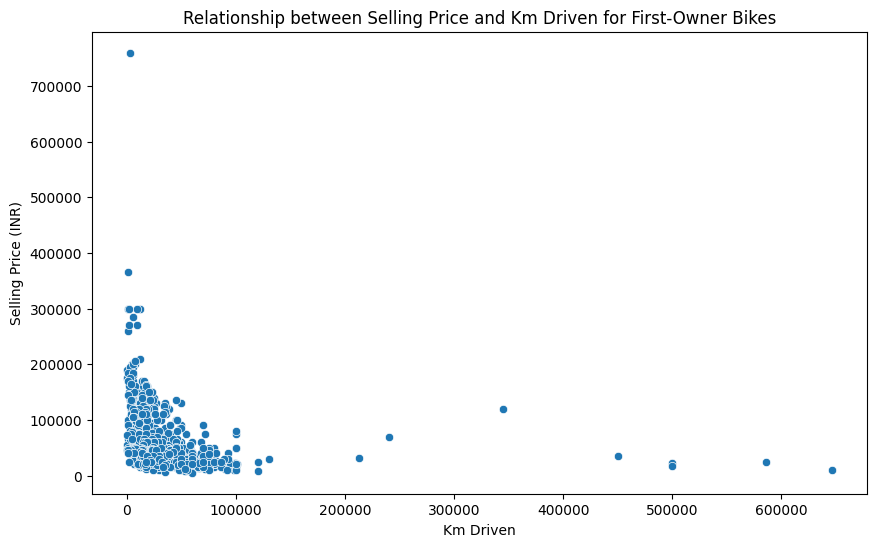

In [14]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title("Relationship between Selling Price and Km Driven for First-Owner Bikes")
plt.xlabel("Km Driven")
plt.ylabel("Selling Price (INR)")
plt.show()

In [15]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
outliers_removed = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
print(f"Number of records after removing outliers in km_driven: {outliers_removed.shape[0]}")

Number of records after removing outliers in km_driven: 1022


Text(0, 0.5, 'Selling Price (INR)')

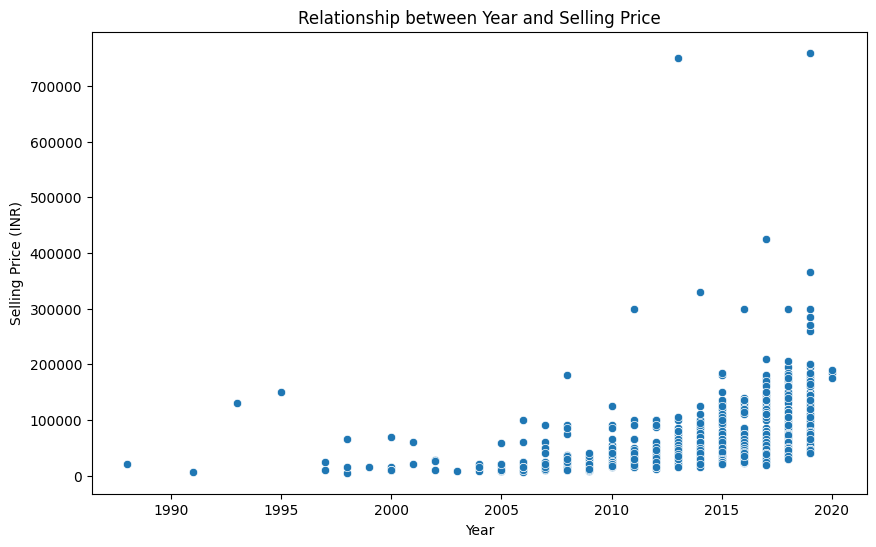

In [16]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title("Relationship between Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")

In [18]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on bike's age:")
print(average_depreciation)

Average depreciation in selling price based on bike's age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [20]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

average_price_per_year = df.groupby('year')['selling_price'].mean()
df = df.merge(average_price_per_year, on='year', suffixes=('', '_avg_year'))
significantly_above_avg = df[df['selling_price'] > df['selling_price_avg_year'] * 1.5]
print("Bikes priced significantly above the average price for their manufacturing year:")
print(significantly_above_avg[['name', 'selling_price', 'year']])

Bikes priced significantly above the average price for their manufacturing year:
                                     name  selling_price  year
2     Royal Enfield Classic Gunmetal Grey         150000  2018
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                          Yamaha YZF R3         365000  2019
18    Royal Enfield Classic Gunmetal Grey         150000  2018
23                          Jawa Standard         180000  2019
..                                    ...            ...   ...
979             Royal Enfield Thunder 500         105000  2015
981             Royal Enfield Thunder 350         105000  2013
983             Royal Enfield Classic 350         100000  2015
984             Royal Enfield Classic 500          95000  2014
985             Royal Enfield Classic 500          90000  2011

[157 rows x 3 columns]


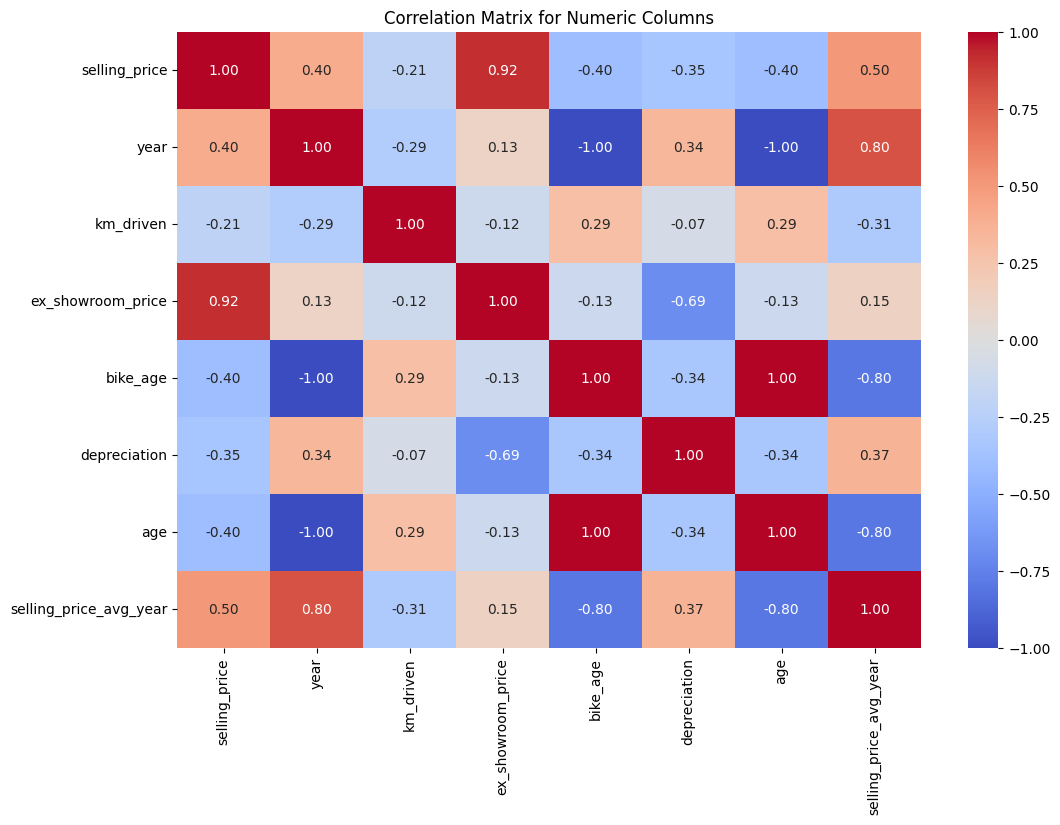

In [22]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numeric Columns")
plt.show()

#EDA - 2

#Title: Car Sale Dataset


In [23]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data from the csv file
df = pd.read_csv('Car Sale.csv')

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


#Questions:


Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

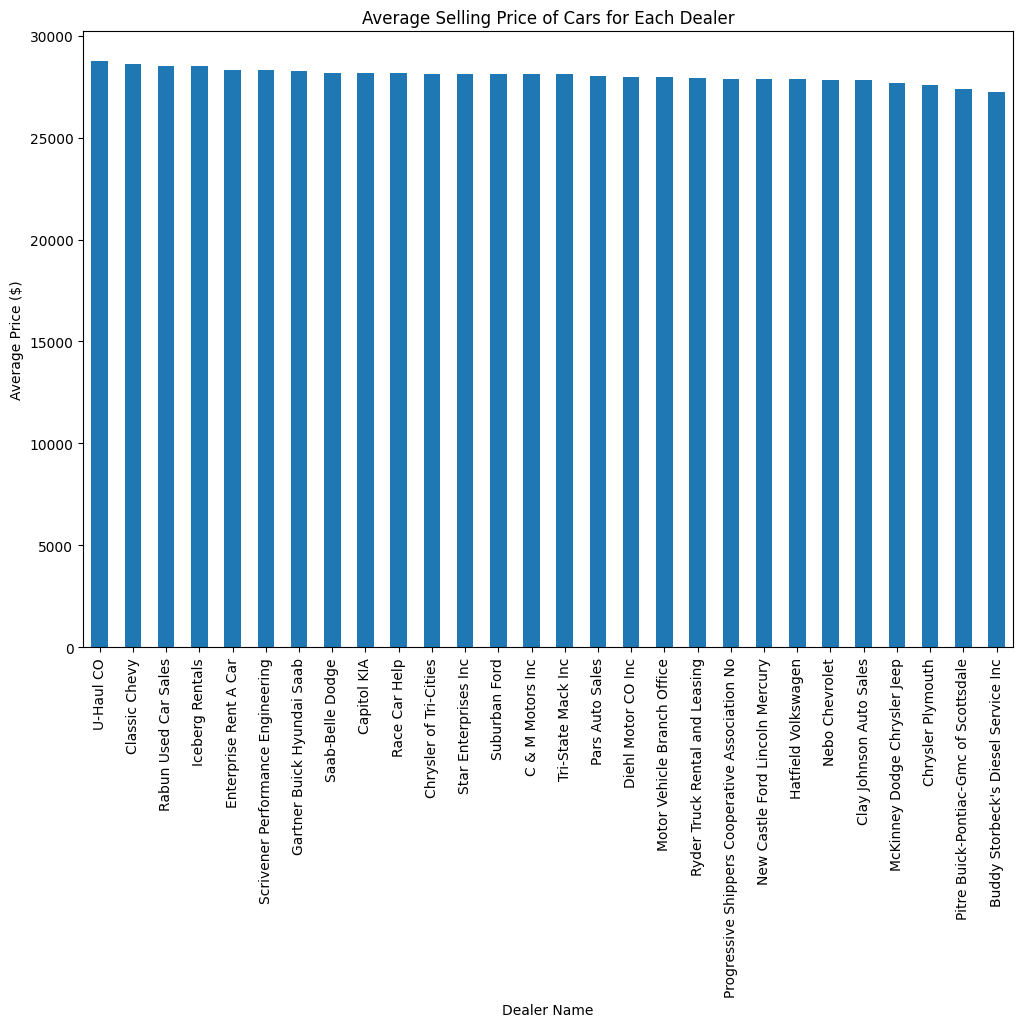

In [25]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price of cars for each dealer:")
print(avg_price_per_dealer)

# Plotting the average selling price of cars for each dealer
plt.figure(figsize=(12, 8))
avg_price_per_dealer.plot(kind='bar')
plt.title("Average Selling Price of Cars for Each Dealer")
plt.xlabel("Dealer Name")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()

In [26]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

car_brand_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Variation in prices for each car brand:")
print(car_brand_variation)

Variation in prices for each car brand:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


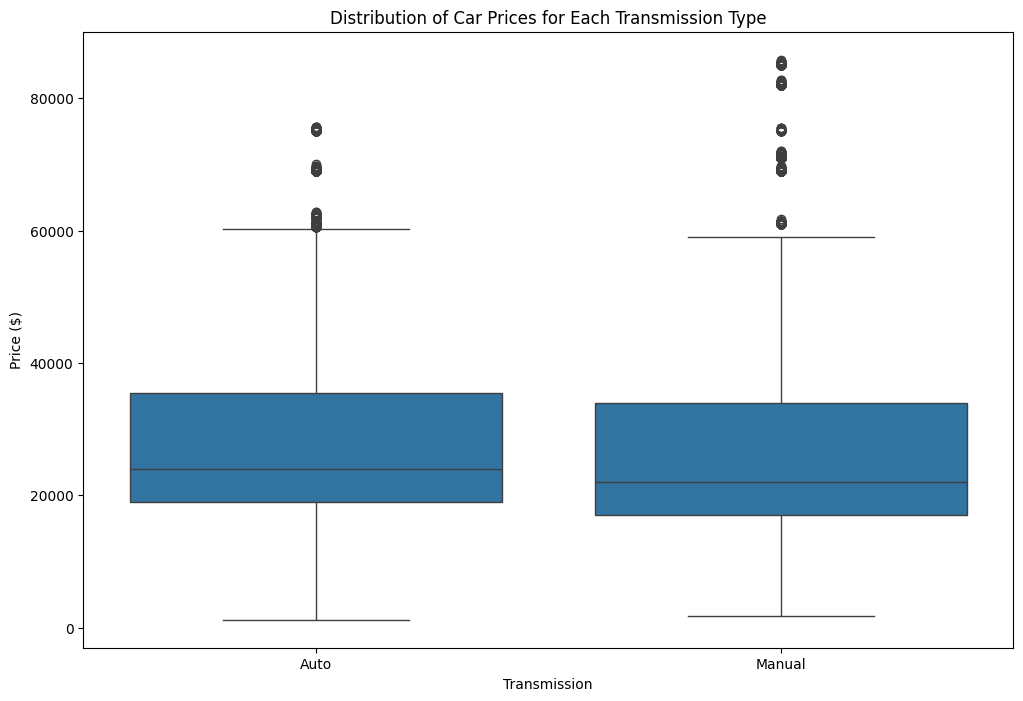

In [28]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Distribution of Car Prices for Each Transmission Type")
plt.show()

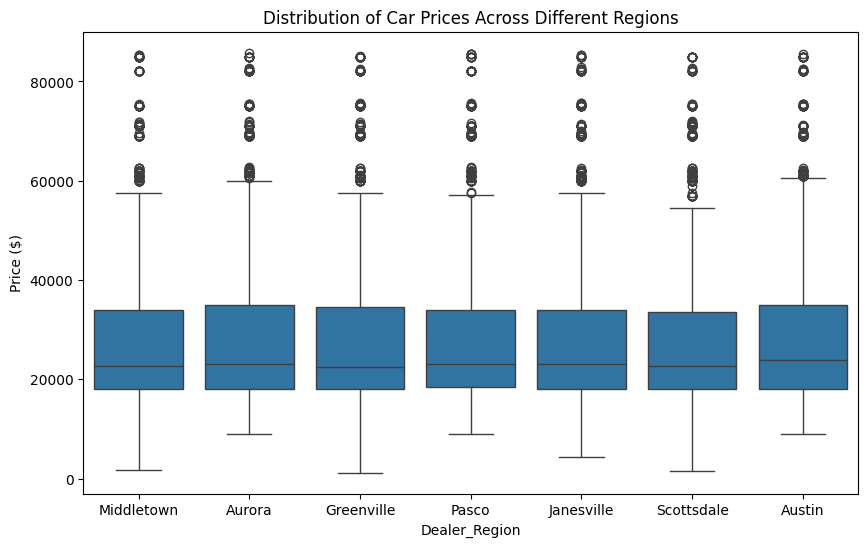

In [30]:
#4. What is the distribution of car prices across different regions?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("Distribution of Car Prices Across Different Regions")
plt.show()

Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


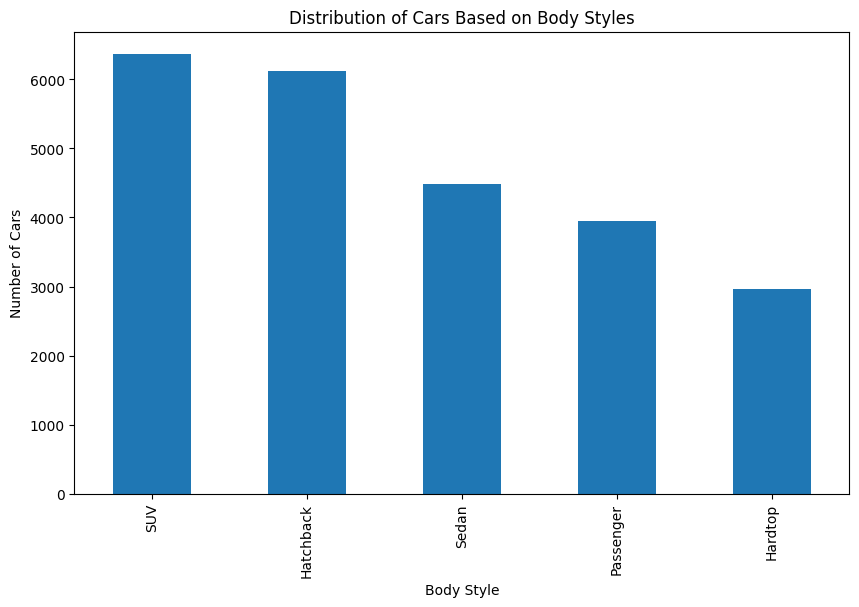

In [32]:
#5. What is the distribution of cars based on body styles?

body_style_distribution = df['Body Style'].value_counts()
print("Distribution of cars based on body styles:")
print(body_style_distribution)

# Plotting the distribution of cars based on body styles
plt.figure(figsize=(10, 6))
body_style_distribution.plot(kind='bar')
plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-b73a9c4f72b4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean().unstack()


Average selling price of cars by customer gender and annual income:
Annual Income  (-1109.92, 2248064.0]  (2248064.0, 4486048.0]  \
Gender                                                         
Female                  28218.888484             30183.05298   
Male                    27996.376891             29021.87871   

Annual Income  (4486048.0, 6724032.0]  (6724032.0, 8962016.0]  \
Gender                                                          
Female                   28318.875000                     NaN   
Male                     27520.139535            40333.333333   

Annual Income  (8962016.0, 11200000.0]  
Gender                                  
Female                             NaN  
Male                           26001.0  


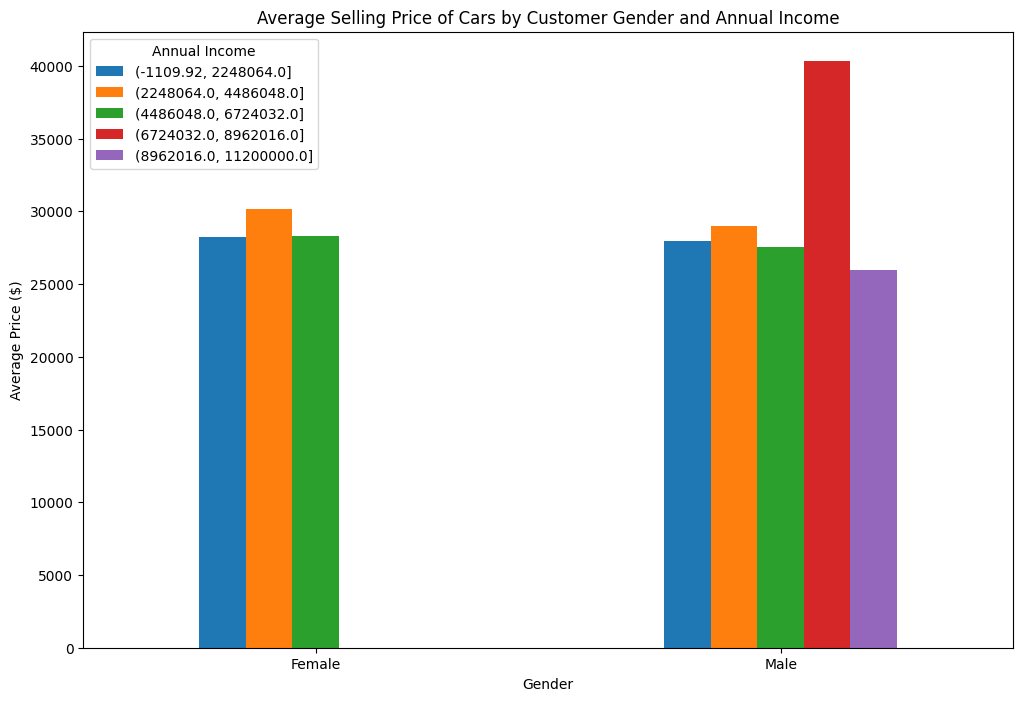

In [34]:
#6. How does the average selling price of cars vary by customer gender and annual income?

avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean().unstack()
print("Average selling price of cars by customer gender and annual income:")
print(avg_price_by_gender_income)

# Plotting the average selling price of cars by customer gender and annual income
avg_price_by_gender_income.plot(kind='bar', figsize=(12, 8))
plt.title("Average Selling Price of Cars by Customer Gender and Annual Income")
plt.xlabel("Gender")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=0)
plt.show()

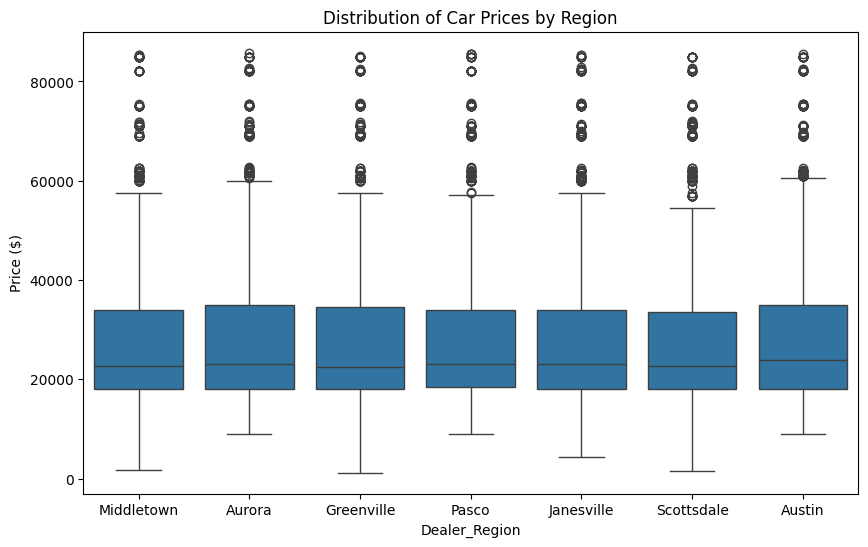

Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


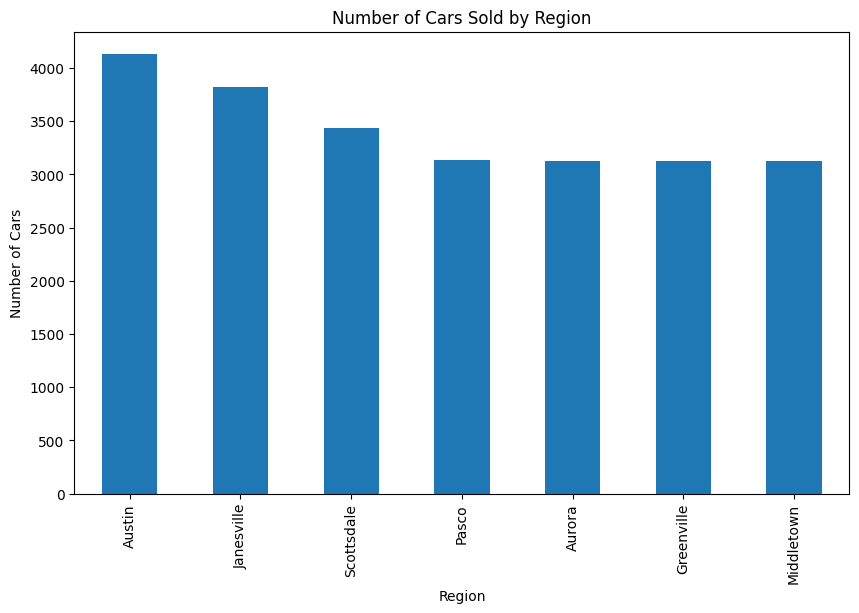

In [36]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("Distribution of Car Prices by Region")
plt.show()

cars_sold_by_region = df['Dealer_Region'].value_counts()
print("Number of cars sold by region:")
print(cars_sold_by_region)

# Plotting the number of cars sold by region
plt.figure(figsize=(10, 6))
cars_sold_by_region.plot(kind='bar')
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars")
plt.xticks(rotation=90)
plt.show()

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


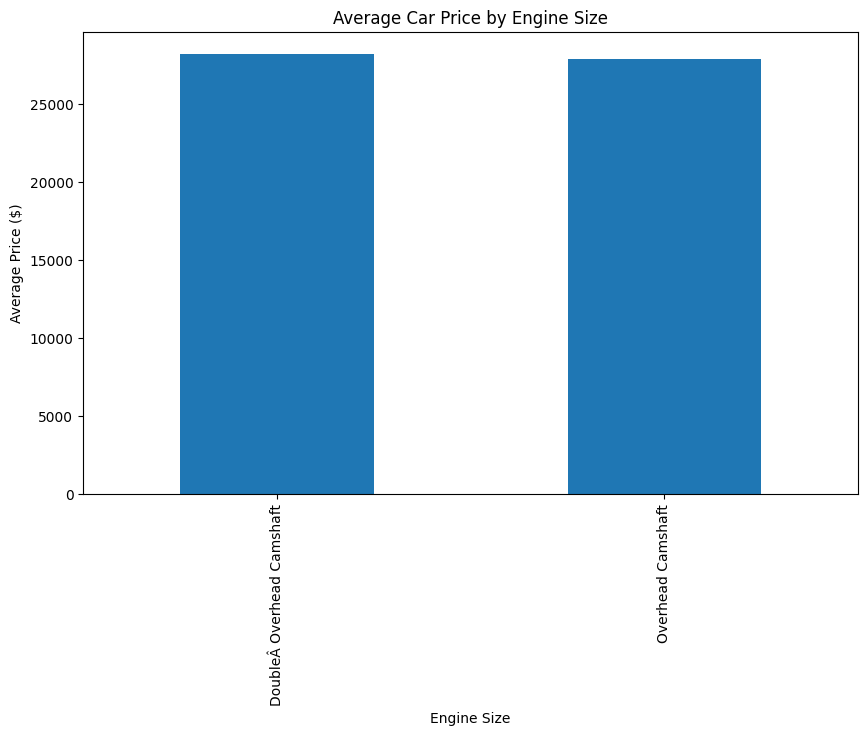

In [38]:
#8. How does the average car price differ between cars with different engine sizes?

avg_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average car price by engine size:")
print(avg_price_by_engine_size)

# Plotting the average car price by engine size
plt.figure(figsize=(10, 6))
avg_price_by_engine_size.plot(kind='bar')
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()


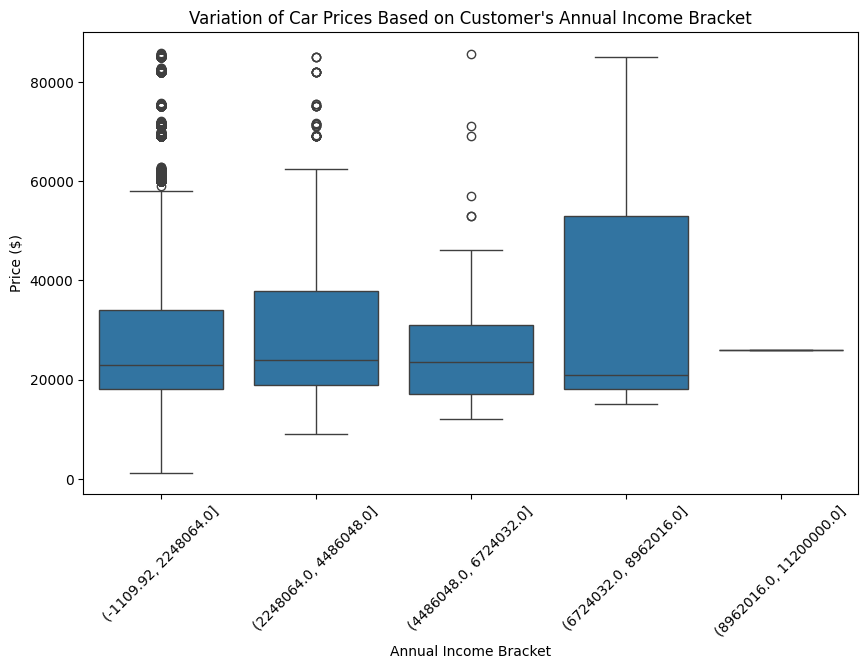

In [39]:
#9. How do car prices vary based on the customer’s annual income bracket?

plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Annual Income'], bins=5), y='Price ($)', data=df)
plt.title("Variation of Car Prices Based on Customer's Annual Income Bracket")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

Top 5 car models with the highest number of sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


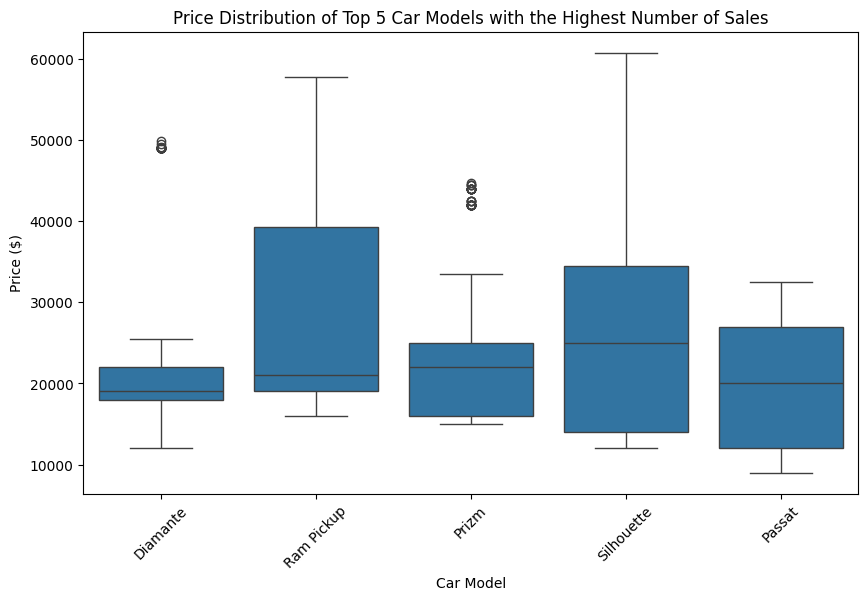

In [41]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_car_models = df['Model'].value_counts().head(5)
print("Top 5 car models with the highest number of sales:")
print(top_5_car_models)

# Plotting the price distribution of the top 5 car models
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_5_car_models.index)])
plt.title("Price Distribution of Top 5 Car Models with the Highest Number of Sales")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

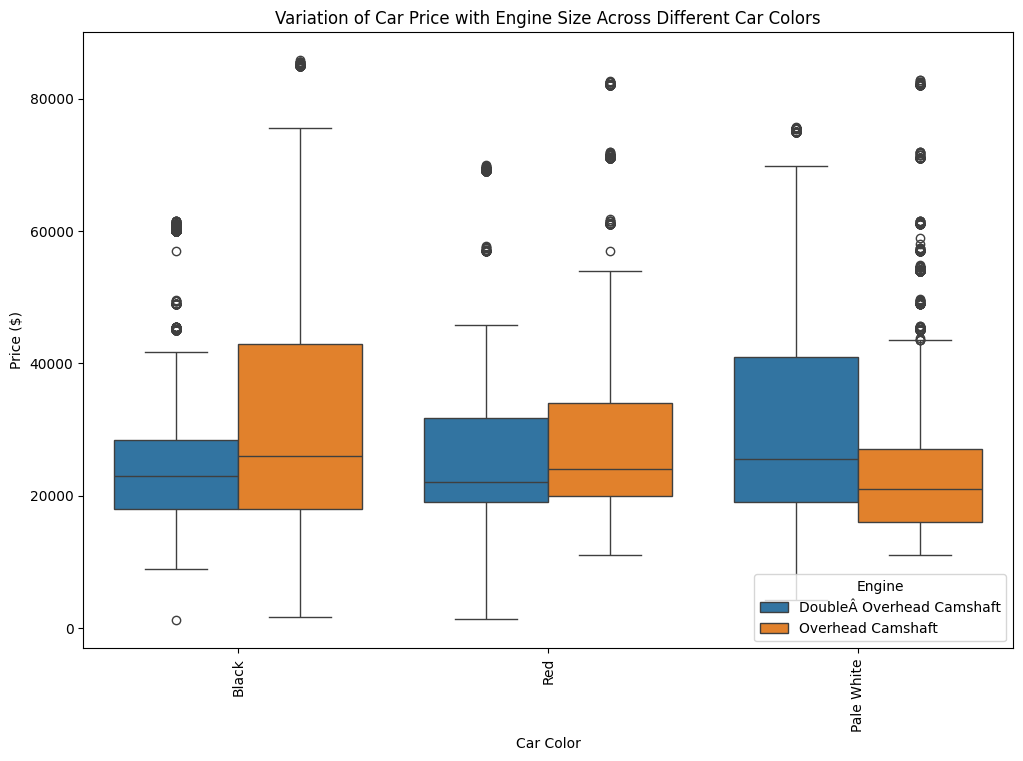

Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [43]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

plt.figure(figsize=(12, 8))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)
plt.title("Variation of Car Price with Engine Size Across Different Car Colors")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.show()

color_price_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with the highest price variation:")
print(color_price_variation)

Seasonal trend in car sales based on the date of sale:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64


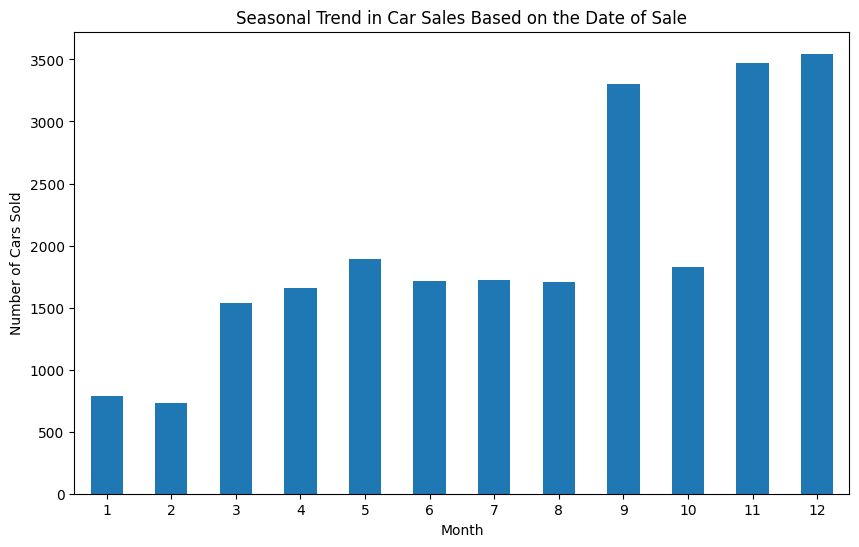

In [45]:
#12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Car_id'].count()
print("Seasonal trend in car sales based on the date of sale:")
print(monthly_sales)

# Plotting the seasonal trend in car sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title("Seasonal Trend in Car Sales Based on the Date of Sale")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=0)
plt.show()

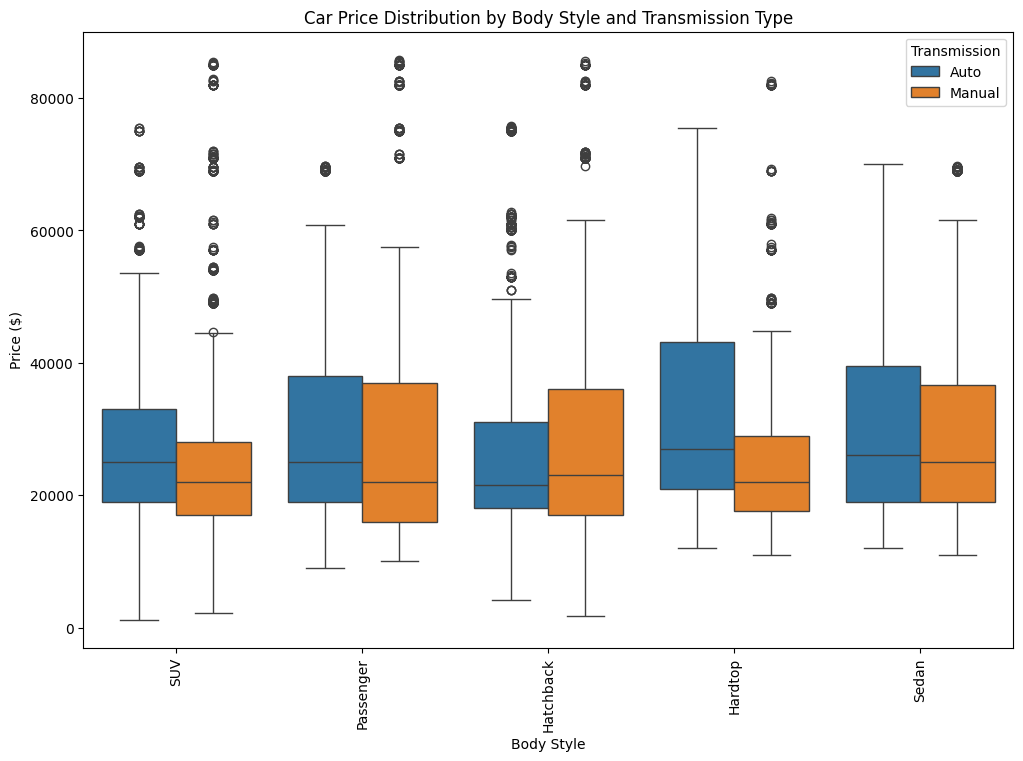

In [47]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.show()

Correlation between car price, engine size, and annual income of customers:
               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


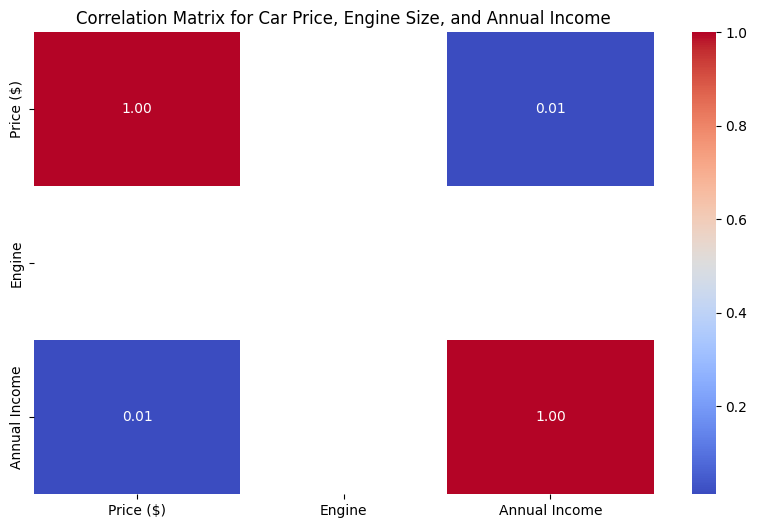

In [49]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df['Engine'] = df['Engine'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if any(filter(str.isdigit, str(x))) else 0)
correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
print("Correlation between car price, engine size, and annual income of customers:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Car Price, Engine Size, and Annual Income")
plt.show()

Average car price by car models and engine types:
Engine               0
Model                 
3-Sep     37986.380117
3000GT    22282.250825
300M      21394.888889
323i      17355.634615
328i      27821.359223
...                ...
Viper     30905.258333
Voyager   31491.110497
Windstar  23682.842975
Wrangler  20134.548780
Xterra    18901.076087

[154 rows x 1 columns]


<Figure size 2000x800 with 0 Axes>

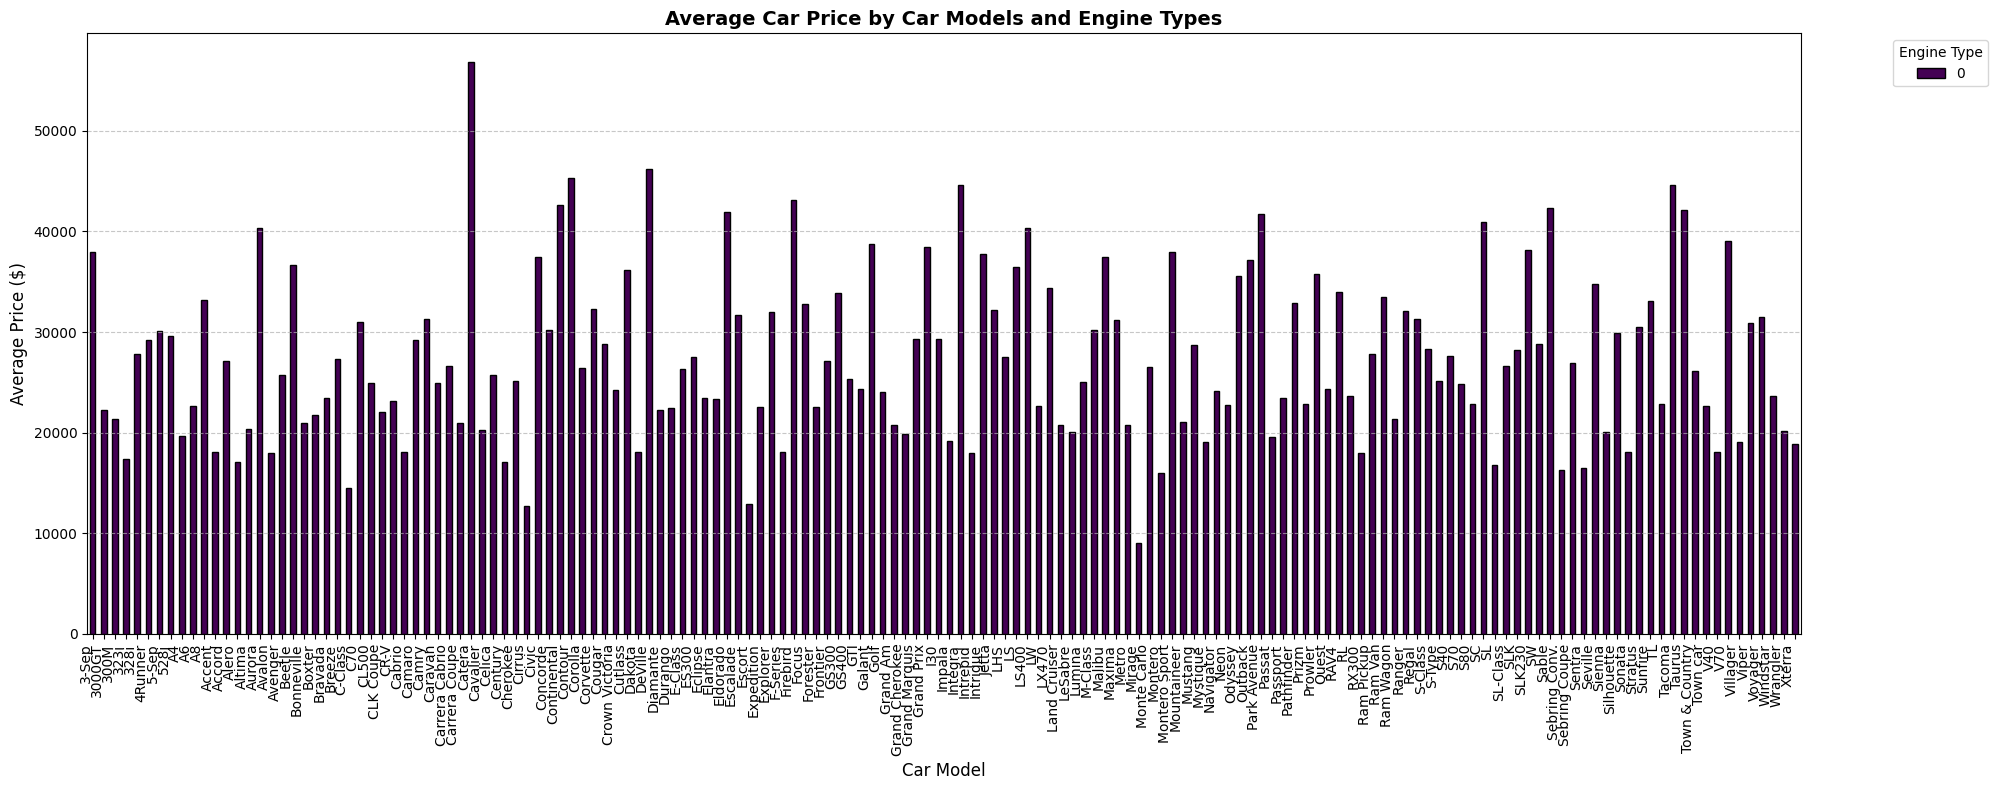

In [51]:
#15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average car price by car models and engine types:")
print(avg_price_by_model_engine)

# Plotting the average car price by car models and engine types
plt.figure(figsize=(20, 8))
ax = avg_price_by_model_engine.plot(kind='bar', stacked=True, width=0.5, colormap='viridis', edgecolor='black', figsize=(20, 8))

plt.title("Average Car Price by Car Models and Engine Types", fontsize=14, fontweight='bold')
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)

plt.xticks(np.arange(len(avg_price_by_model_engine.index)), avg_price_by_model_engine.index, rotation=90, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#EDA 3
#Title: Amazon Sales Data

In [52]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# reading the data from the csv file
df = pd.read_csv('amazon.csv')

# Display basic information about the dataset
df.info()
df.head()

# Ensure that 'rating' and 'rating_count' are numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].replace({'₹': '', ',': ''}, regex=True), errors='coerce')

# Drop rows with NaN values in rating column
df = df.dropna(subset=['rating'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [54]:
#1. What is the average rating for each product category?

avg_rating_by_category = df.groupby('category')['rating'].mean()
print("Average rating for each product category:")
print(avg_rating_by_category)


Average rating for each product category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProduc

In [57]:
#2. What are the top rating_count products by category?

top_rating_count_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print("Top Rating Count Products by Category:")
print(top_rating_count_by_category)



Top Rating Count Products by Category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headphones Wit

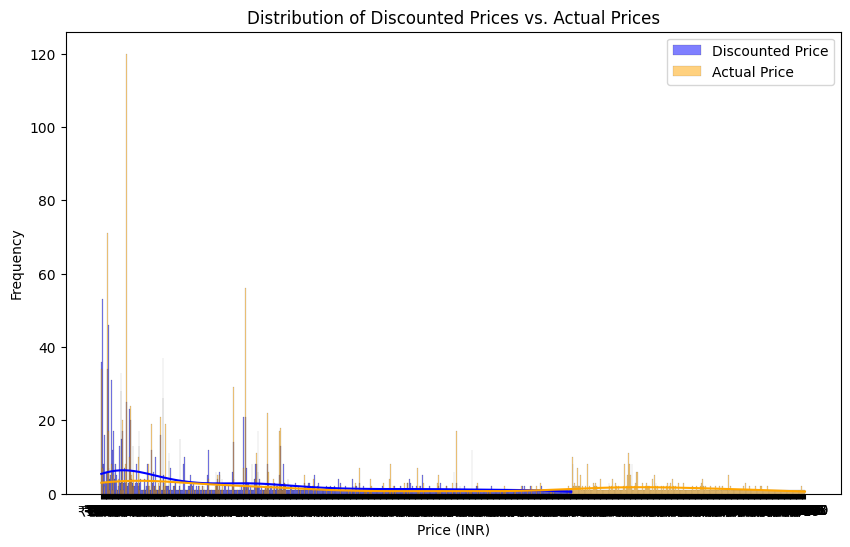

In [58]:
#3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='discounted_price', color='blue', label='Discounted Price', kde=True, bins=30)
sns.histplot(data=df, x='actual_price', color='orange', label='Actual Price', kde=True, bins=30)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
#4. How does the average discount percentage vary across categories?

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

average_discount_percentage = df.groupby('category')['discount_percentage'].mean()
print("Average Discount Percentage Across Categories:")
print(average_discount_percentage)

Average Discount Percentage Across Categories:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Writ

In [65]:
#5. What are the most popular product names?

most_popular_products = df['product_name'].value_counts().head(10)
print("Most Popular Product Names:")
print(most_popular_products)


Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            3
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)                                                                                                    3
MI Usb Type-C Cable Smartphone (Black)                                                                                                     

In [68]:
#6. What are the most popular product keywords?

keywords = df['product_name'].str.cat(sep=' ').lower()
keywords_list = re.findall(r'\b\w+\b', keywords)
most_common_keywords = Counter(keywords_list).most_common(10)
print("Most Popular Product Keywords:")
print(most_common_keywords)

Most Popular Product Keywords:
[('with', 751), ('for', 674), ('black', 529), ('usb', 417), ('cable', 414), ('1', 413), ('and', 330), ('c', 289), ('3', 274), ('2', 267)]


In [70]:
#7. What are the most popular product reviews?

most_popular_reviews = df['review_title'].value_counts().head(10)
print("Most Popular Product Reviews:")
print(most_popular_reviews)


Most Popular Product Reviews:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super 

In [72]:
#8. What is the correlation between discounted_price and rating?

df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

Correlation between Discounted Price and Rating: 0.12


In [73]:
#9. What are the Top 5 categories based on the highest ratings?

top_5_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories based on Highest Ratings:")
print(top_5_categories)

Top 5 Categories based on Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [74]:
#10. Identify any potential areas for improvement or optimization based on the data analysis?

low_rating_high_count = df[(df['rating'] < 3) & (df['rating_count'] > 100)]
print("Categories with Low Ratings but High Rating Counts:")
print(low_rating_high_count[['category', 'rating', 'rating_count']])

Categories with Low Ratings but High Rating Counts:
                                               category  rating  rating_count
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     2.8         109.0
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...     2.9         159.0


#EDA - 4
#Spotify Data:- Popular Hip-hop Artists and Tracks



In [75]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data from the csv file
df = pd.read_csv('spotify.csv')

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


#Questions:-

In [80]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

# Read the dataframe
df = pd.read_csv('spotify.csv')

# Check for null values
print("Null values in each column:")
print(df.isnull().sum())

# Handle null values if present (e.g., drop or fill)
df.dropna(inplace=True)  # Dropping rows with null values

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if present
if duplicates > 0:
    df.drop_duplicates(inplace=True)

    df.isnull().sum()
df


Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


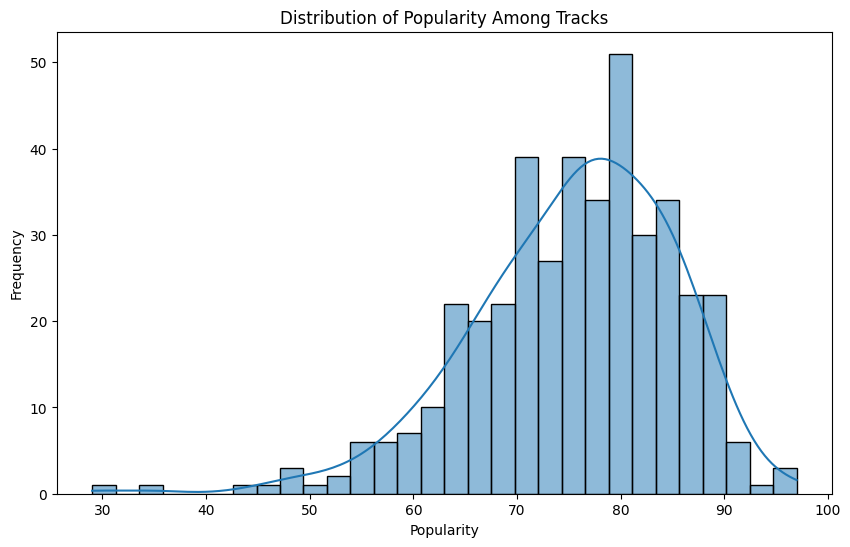

In [81]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

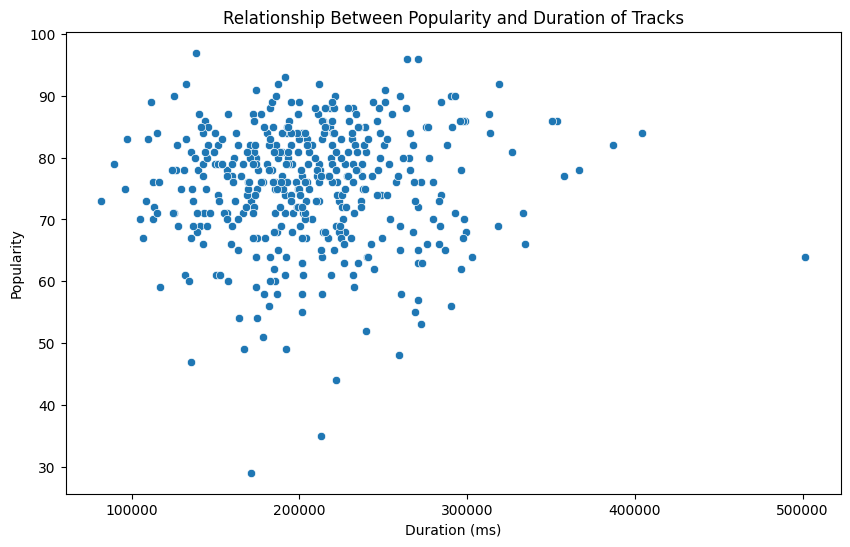

In [83]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Artist with the highest number of tracks: Drake (17 tracks)


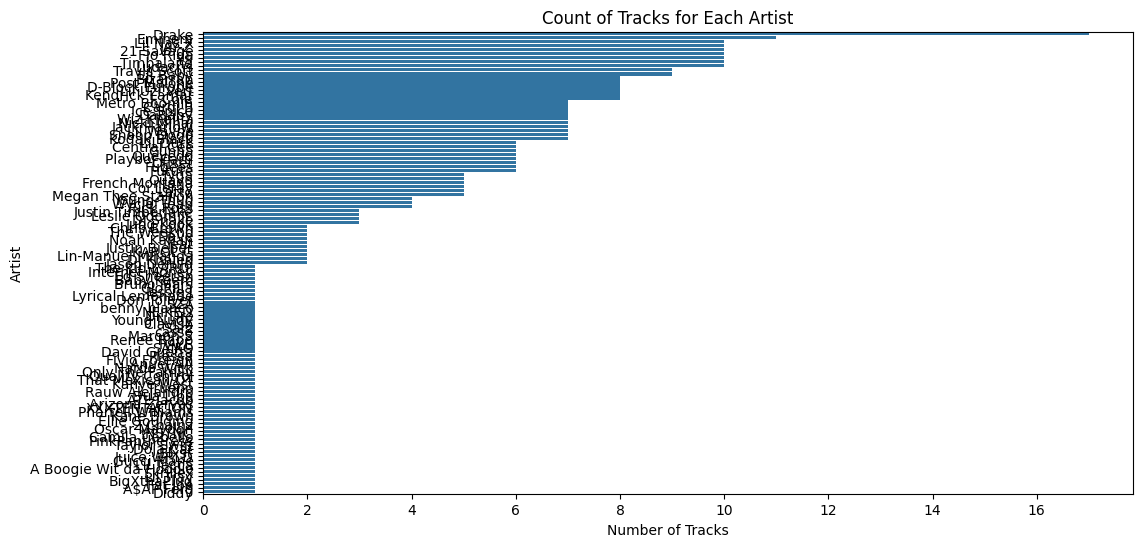

In [86]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

artist_counts = df['Artist'].value_counts()
top_artist = artist_counts.idxmax()
top_artist_count = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_artist_count} tracks)")

# Display count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=artist_counts.index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


In [88]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [91]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists = artist_counts.nlargest(5).index
average_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print("Average Popularity for Each of the Top 5 Most Popular Artists:")
print(average_popularity)

Average Popularity for Each of the Top 5 Most Popular Artists:
Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [93]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

for artist in top_5_artists:
    most_popular_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"Most Popular Track for {artist}:")
    print(most_popular_track)

Most Popular Track for Drake:
                                Track Name  Popularity
0  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Most Popular Track for Eminem:
    Track Name  Popularity
80  Without Me          90
Most Popular Track for Lil Nas X:
            Track Name  Popularity
312  THATS WHAT I WANT          81
Most Popular Track for JAY-Z:
          Track Name  Popularity
100  Ni**as In Paris          86
Most Popular Track for 21 Savage:
   Track Name  Popularity
70     redrum          96


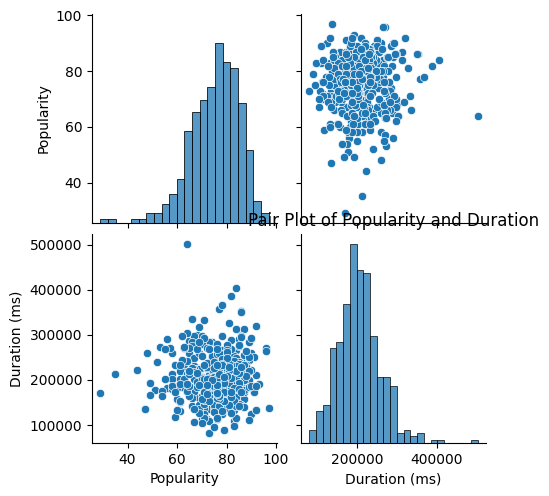

In [95]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Popularity and Duration')
plt.show()


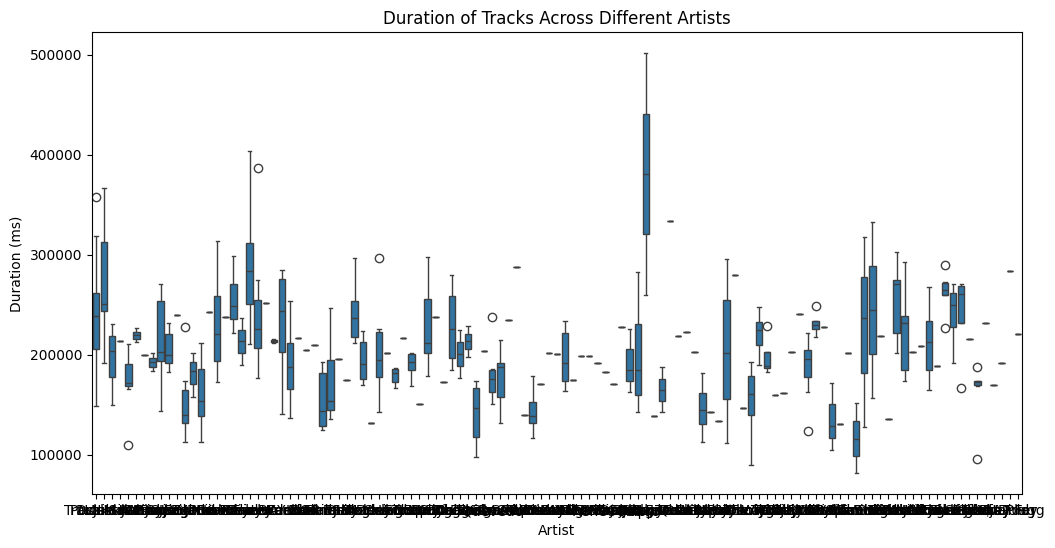

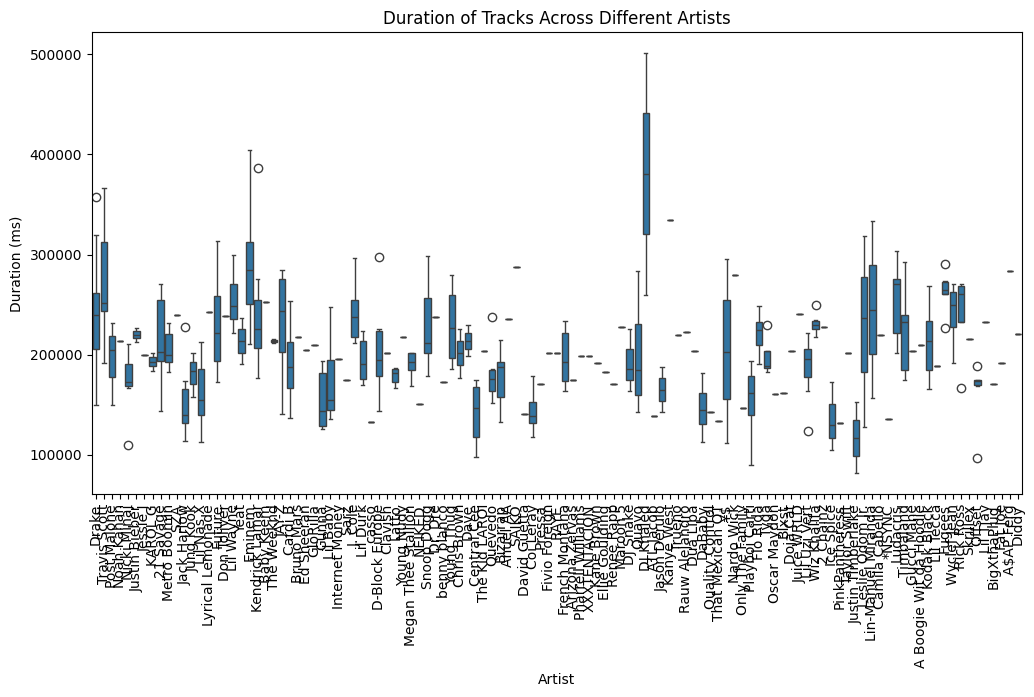

In [97]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Duration of Tracks Across Different Artists')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()


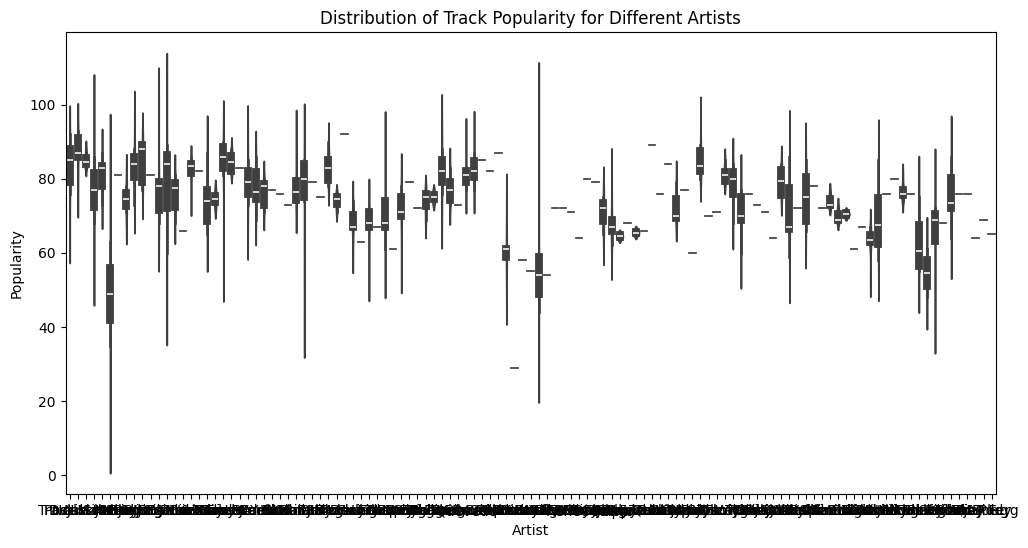

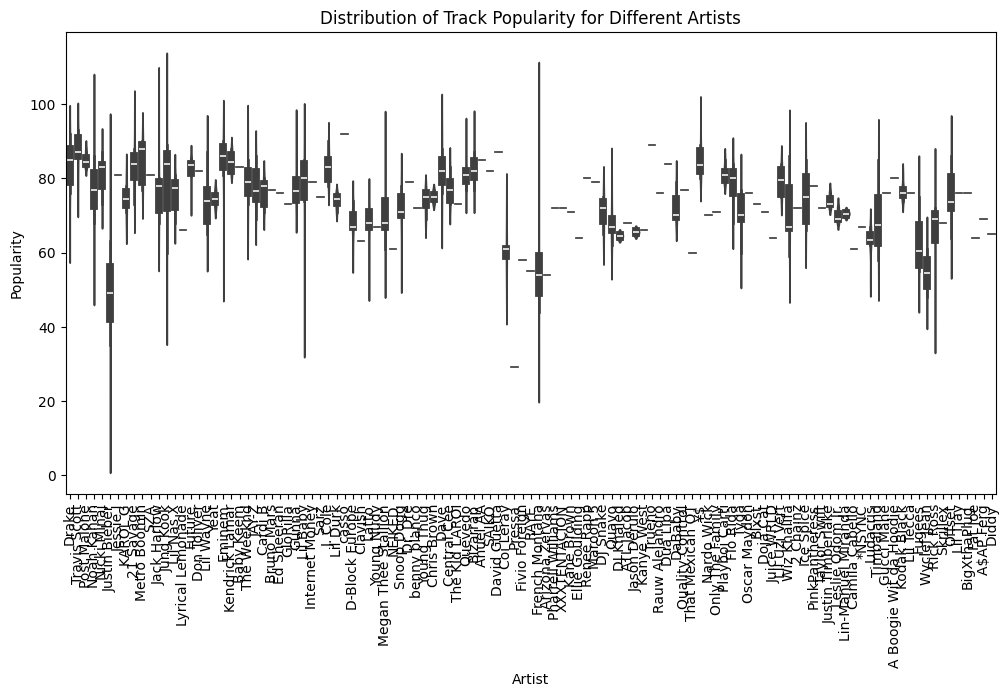

In [99]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()